# Classification Project

In this project, you will work with the breast cancer dataset again and use different classification models. The goal is to predict whether we are in a case malignant or benign. You will use things you have learned from cross-validation and from hyperparameter search.

## Part 0 - Importing the Dataset

The cell below imports the relevant libraries you need and imports the breast cancer dataset. Run the cell below without modifying it, and then you can proceed.

In [1]:
# Non-sklearn packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Getting the data and targets
X = pd.DataFrame(load_breast_cancer()['data'], columns=load_breast_cancer()['feature_names'])
y = pd.DataFrame(load_breast_cancer()['target'], columns=["target"])

# Printing out description of the dataset
print(load_breast_cancer()['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Part 1 - Exploring the Dataset

When exploring the data, it is good to have the features and targets in a single dataframe. Combine the variables `X` and `y` into a single dataframe called `combined`:

In [2]:
# Combine into a single dataframe
combined = pd.concat((X, y), axis=1)

In [3]:
# Show the first 5 rows of the dataframe
combined.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [4]:
# Get summary statistics for the columns
combined.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [5]:
# Check if there are any missing values
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
# How many of the patients are in the class "malignant" or "benign"
target_aggregated = combined["target"].value_counts()
print(target_aggregated)

1    357
0    212
Name: target, dtype: int64


<BarContainer object of 2 artists>

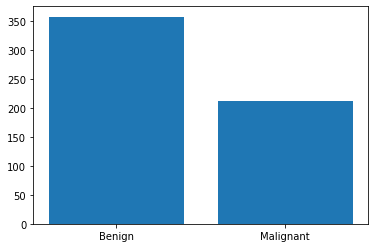

In [7]:
# Visualize with a bar chart how many of the patients are in the class "malignant" or "benign"
plt.bar(x=["Benign", "Malignant"], height=target_aggregated)

In [8]:
# Check the correlation of the combined dataframe
combined.corr()

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   
target                     -0.730029     -0.415185       -0.742636  -0.708984   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error        

<AxesSubplot:>

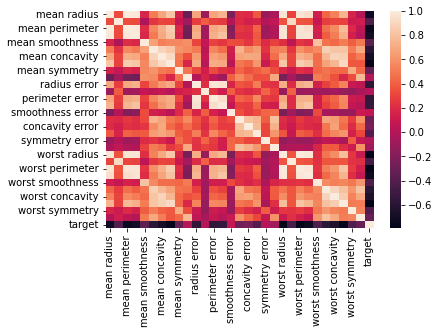

In [9]:
# Plot the correlation of combined with a heatmap (HINT: sns.heatmap)
sns.heatmap(combined.corr())

Which features looks to be highly correlated with the target?

## Part 2 - Preprocessing

It is now time to start preprocessing the dataset. There are no missing values, so we only need to normalize the data. Before doing this, we should create a test set (since we are planning to evaluate our final chosen model on this). Doing this BEFORE any data processing allows us to avoid data leakage. 

We do not need the variable `combined` anymore and we can stick to `X` and `y` variables. Let us first separate 10% of the dataset by using `train_test_split`:

In [10]:
# Separate 10% of the dataset
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Now we can use StandardScaler individually on the main part and the test data set. We DO NOT need to scale the variables target variables.

In [11]:
# Use StandardScaler to scale both the main part, and the test set
scaler = StandardScaler()
X_cv_scaled = scaler.fit_transform(X_cv)
X_test_scaled = scaler.transform(X_test)

The shape of the targets indicate that they are two-dimensional NumPy arrays. But for the `GridSearchCV` class that we will use later, it is required that they be one-dimensional. Use `np.ravel` to flatten the targets to be one-dimensional:

In [12]:
# Flatten the targets
y_cv = np.ravel(y_cv)
y_test = np.ravel(y_test)

## Part 3 - Random Forests and Hyperparameters

In this section we will create a random forest with different amount of decision trees in them. The goal is to get experience with hyperparameter search with a single hyperparameter.

In [13]:
# Create a random forest classifier
forest = RandomForestClassifier()

The `RandomForestClassifier` class has a `n_estimators` hyperparameter that decides the number of decision trees in the model. Create a Python dictionary called `param_grid_forest` that specifies the values `1` `2`, `5`, `10`, `20`, `50`, `100`, `200`, `500`, `1000` for the `n_estimators` hyperparameter.

In [14]:
# Specify the Python dictionary with the n_estimators key
param_grid_forest = {"n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]}

# Use GridSearchCV on the random forest model with the param_grid set to the above Python dictionary
grid_forest = GridSearchCV(forest, param_grid=param_grid_forest, cv=5, verbose=2)

In [15]:
# Fit the GridSearchCV model to the data
grid_forest.fit(X_cv_scaled, y_cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 5, 10, 20, 50, 100, 200, 500,
                                          1000]},
             verbose=2)

In [16]:
# Check out the results
pd.DataFrame(grid_forest.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.005436      0.006631         0.000797        0.000398   
1       0.003212      0.000259         0.000399        0.000489   
2       0.007147      0.000359         0.000906        0.000185   
3       0.013049      0.000342         0.001197        0.000399   
4       0.025194      0.000381         0.002208        0.000276   
5       0.062835      0.000246         0.004499        0.000323   
6       0.124861      0.002941         0.007944        0.000324   
7       0.245876      0.002850         0.015488        0.000548   
8       0.609497      0.006242         0.038185        0.000806   
9       1.230504      0.027692         0.074863        0.000667   

  param_n_estimators                  params  split0_test_score  \
0                  1     {'n_estimators': 1}           0.961165   
1                  2     {'n_estimators': 2}           0.961165   
2                  5     {'n_estimators': 5}           0.961165   
3                 10    {'n_estimators': 10}           0.970874   
4                 20    {'n_estimators': 20}           0.980583   
5                 50    {'n_estimators': 50}           0.990291   
6                100   {'n_estimators': 100}           0.970874   
7                200   {'n_estimators': 200}           0.970874   
8                500   {'n_estimators': 500}           0.980583   
9               1000  {'n_estimators': 1000}           0.980583   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.932039           0.911765           0.892157           0.931373   
1           0.922330           0.911765           0.901961           0.911765   
2           0.932039           0.960784           0.931373           0.921569   
3           0.961165           0.941176           0.941176           0.960784   
4           0.951456           0.950980           0.950980           0.941176   
5           0.961165           0.960784           0.970588           0.941176   
6           0.961165           0.960784           0.960784           0.960784   
7           0.941748           0.960784           0.950980           0.950980   
8           0.941748           0.960784           0.960784           0.941176   
9           0.941748           0.960784           0.960784           0.960784   

   mean_test_score  std_test_score  rank_test_score  
0         0.925700        0.023019                9  
1         0.921797        0.020712               10  
2         0.941386        0.016419                8  
3         0.955035        0.011880                6  
4         0.955035        0.013345                6  
5         0.964801        0.015942                1  
6         0.962878        0.004000                2  
7         0.955073        0.009933                5  
8         0.957015        0.014614                4  
9         0.960937        0.012282                3

In [17]:
# Get the best score
grid_forest.best_score_

0.9648010660574909

In [18]:
# Get the best forest model
best_forest = grid_forest.best_estimator_

In [42]:
# Predict on the scaled test data
y_test_pred_forest = best_forest.predict(X_test_scaled)

In [43]:
# Get the accuracy for the best forest
accuracy_forest = accuracy_score(y_test, y_test_pred_forest)
print("Accuracy for best forest: ", accuracy_forest)

# Get the precision for the best forest
precision_forest = precision_score(y_test, y_test_pred_forest)
print("Precision for best forest: ", precision_forest)

# Get the recall for the best forest
recall_forest = recall_score(y_test, y_test_pred_forest)
print("Recall for best forest: ", recall_forest)

Accuracy for best forest:  0.9824561403508771
Precision for best forest:  0.975
Recall for best forest:  1.0


## Part 4 - SVMs and Hyperparameters

In this section we will create a support vector machine with values for the `C` hyperparameter and the `degree` hyperparameter. The goal is to get experience with hyperparameter search with two hyperparameters.

In [20]:
# Create a support vector machine with kernel equal to "poly"
svc = SVC(kernel="poly")

The `SVC` class has a `C` hyperparameter and a `degree` hyperparameter (whenever we specify that the `kernel` should be `poly`). Create a Python dictionary called `param_grid_svc` that specifies the values `1` `2`, `5`, `10` for the `C` hyperparameter, and the values `1`, `2`, `3`, `4` for the `degree` hyperparameter.

In [21]:
# Specify the Python dictionary with the C and degree keys
param_grid_svc = {'C': [1, 2, 5, 10], 'degree': [1, 2, 3, 4]}

# Use GridSearchCV on the SVC model with the param_grid set to the above Python dictionary
grid_svc = GridSearchCV(svc, param_grid=param_grid_svc, cv=5, verbose=2)

In [22]:
# Fit the GridSearchCV model to the data
grid_svc.fit(X_cv_scaled, y_cv)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ......................................C=1, degree=1; total time=   0.0s
[CV] END ......................................C=1, degree=1; total time=   0.0s
[CV] END ......................................C=1, degree=1; total time=   0.0s
[CV] END ......................................C=1, degree=1; total time=   0.0s
[CV] END ......................................C=1, degree=1; total time=   0.0s
[CV] END ......................................C=1, degree=2; total time=   0.0s
[CV] END ......................................C=1, degree=2; total time=   0.0s
[CV] END ......................................C=1, degree=2; total time=   0.0s
[CV] END ......................................C=1, degree=2; total time=   0.0s
[CV] END ......................................C=1, degree=2; total time=   0.0s
[CV] END ......................................C=1, degree=3; total time=   0.0s
[CV] END ......................................C

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [1, 2, 5, 10], 'degree': [1, 2, 3, 4]},
             verbose=2)

In [25]:
# Check out the results
pd.DataFrame(grid_svc.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.004646      0.005796         0.000899        0.000491       1   
1        0.004487      0.000321         0.000798        0.000399       1   
2        0.003031      0.000282         0.000512        0.000453       1   
3        0.004618      0.000370         0.001001        0.000317       1   
4        0.001910      0.000203         0.000401        0.000491       2   
5        0.004890      0.000482         0.000903        0.000186       2   
6        0.002336      0.000377         0.000598        0.000489       2   
7        0.004847      0.000643         0.001075        0.000155       2   
8        0.002040      0.000455         0.000199        0.000399       5   
9        0.004801      0.000254         0.000881        0.000468       5   
10       0.002395      0.000491         0.000399        0.000488       5   
11       0.005212      0.000238         0.000899        0.000197       5   
12       0.001661      0.000554         0.000508        0.000640      10   
13       0.005250      0.000580         0.001102        0.000202      10   
14       0.002395      0.000374         0.000000        0.000000      10   
15       0.005478      0.000726         0.001000        0.000317      10   

   param_degree                  params  split0_test_score  split1_test_score  \
0             1   {'C': 1, 'degree': 1}           0.980583           0.970874   
1             2   {'C': 1, 'degree': 2}           0.844660           0.805825   
2             3   {'C': 1, 'degree': 3}           0.922330           0.864078   
3             4   {'C': 1, 'degree': 4}           0.825243           0.805825   
4             1   {'C': 2, 'degree': 1}           0.980583           0.980583   
5             2   {'C': 2, 'degree': 2}           0.854369           0.825243   
6             3   {'C': 2, 'degree': 3}           0.941748           0.902913   
7             4   {'C': 2, 'degree': 4}           0.825243           0.805825   
8             1   {'C': 5, 'degree': 1}           0.990291           0.970874   
9             2   {'C': 5, 'degree': 2}           0.873786           0.844660   
10            3   {'C': 5, 'degree': 3}           0.970874           0.932039   
11            4   {'C': 5, 'degree': 4}           0.825243           0.825243   
12            1  {'C': 10, 'degree': 1}           0.990291           0.970874   
13            2  {'C': 10, 'degree': 2}           0.893204           0.844660   
14            3  {'C': 10, 'degree': 3}           0.980583           0.951456   
15            4  {'C': 10, 'degree': 4}           0.815534           0.796117   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0            0.970588           0.990196           0.970588         0.976566   
1            0.823529           0.754902           0.784314         0.802646   
2            0.921569           0.931373           0.872549         0.902380   
3            0.813725           0.735294           0.794118         0.794841   
4            0.970588           0.990196           0.980392         0.980468   
5            0.862745           0.784314           0.803922         0.826118   
6            0.931373           0.941176           0.892157         0.921873   
7            0.833333           0.774510           0.784314         0.804645   
8            0.970588           1.000000           0.960784         0.978508   
9            0.892157           0.823529           0.813725         0.849572   
10           0.950980           0.960784           0.911765         0.945288   
11           0.872549           0.784314           0.803922         0.822254   
12           0.960784           0.990196           0.970588         0.976547   
13           0.901961           0.833333           0.823529         0.859338   
14           0.960784           0.941176           0.921569         0.951114   
15           0.882353           0.774510           0.

In [26]:
# Get the best score
grid_svc.best_score_

0.980468303826385

In [27]:
# Get the best forest model
best_svc = grid_svc.best_estimator_

In [44]:
# Predict on the scaled test data
y_test_pred_svc = best_svc.predict(X_test_scaled)

In [45]:
# Get the accuracy for the best SVC
accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
print("Accuracy for best SVC: ", accuracy_svc)

# Get the precision for the best SVC
precision_svc = precision_score(y_test, y_test_pred_svc)
print("Precision for best SVC: ", precision_svc)

# Get the recall for the best SVC
recall_svc = recall_score(y_test, y_test_pred_svc)
print("Recall for best SVC: ", recall_svc)

Accuracy for best SVC:  0.9473684210526315
Precision for best SVC:  0.95
Recall for best SVC:  0.9743589743589743


What conclusions can you draw form the results? Should you continue with the support vector machine, or the random forest?